In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandasql import sqldf

In [26]:
# Load text file into local variable called 'data'
df = pd.read_table('purchases.txt', header = None)

/anaconda3/envs/deep_learning/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


## EDA

In [27]:
df.head()

,0,1,2
0,760,25.0,2009-11-06
1,860,50.0,2012-09-28
2,1200,100.0,2005-10-25
3,1420,50.0,2009-07-09
4,1940,70.0,2013-01-25


In [28]:
df.describe()

,0,1
count,51243.000000,51243.000000
mean,108934.547938,62.337195
std,67650.610139,156.606801
min,10.000000,5.000000
25%,57720.000000,25.000000
50%,102440.000000,30.000000
75%,160525.000000,60.000000
max,264200.000000,4500.000000


In [29]:
# Add headers and interpret the last columns as a date, extract year of purchase
# Add headers and interpret the last column as a date, extract year of purchase
df.columns = ['customer_id', 'purchase_amount', 'date_of_purchase']
df['date_of_purchase'] = pd.to_datetime(df.date_of_purchase)
df['year_of_purchase'] = pd.DatetimeIndex(df['date_of_purchase']).year

In [30]:
df.head()

,customer_id,purchase_amount,date_of_purchase,year_of_purchase
0,760,25.0,2009-11-06,2009
1,860,50.0,2012-09-28,2012
2,1200,100.0,2005-10-25,2005
3,1420,50.0,2009-07-09,2009
4,1940,70.0,2013-01-25,2013


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51243 entries, 0 to 51242
Data columns (total 4 columns):
customer_id         51243 non-null int64
purchase_amount     51243 non-null float64
date_of_purchase    51243 non-null datetime64[ns]
year_of_purchase    51243 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 1.6 MB


In [31]:
df.describe()

,customer_id,purchase_amount,year_of_purchase
count,51243.000000,51243.000000,51243.000000
mean,108934.547938,62.337195,2010.869699
std,67650.610139,156.606801,2.883072
min,10.000000,5.000000,2005.000000
25%,57720.000000,25.000000,2009.000000
50%,102440.000000,30.000000,2011.000000
75%,160525.000000,60.000000,2013.000000
max,264200.000000,4500.000000,2015.000000


In [55]:
# Explore data using simple SQL statements
# Number of purchases per year
x = sqldf("SELECT year_of_purchase, COUNT(year_of_purchase) AS 'counter' FROM df GROUP BY 1 ORDER BY 1", globals())
x.head()

,year_of_purchase,counter
0,2005,1470
1,2006,2182
2,2007,4674
3,2008,4331
4,2009,5054


In [56]:

# Average purchase amount per year
x = sqldf("SELECT year_of_purchase, AVG(purchase_amount) AS 'avg_amount' FROM df GROUP BY 1 ORDER BY 1", globals())
x.head()

,year_of_purchase,avg_amount
0,2005,55.826122
1,2006,52.250454
2,2007,49.264014
3,2008,53.071780
4,2009,50.745253


In [57]:
# Total purchase amounts per year
x = sqldf("SELECT year_of_purchase, SUM(purchase_amount) AS 'sum_amount' FROM df GROUP BY 1 ORDER BY 1", globals())
x.head()

,year_of_purchase,sum_amount
0,2005,82064.40
1,2006,114010.49
2,2007,230260.00
3,2008,229853.88
4,2009,256466.51


In [59]:
# All in one
x = sqldf("SELECT year_of_purchase, COUNT(year_of_purchase) AS 'counter', AVG(purchase_amount) AS 'avg_amount', SUM(purchase_amount) AS 'sum_amount' FROM data GROUP BY 1 ORDER BY 1", globals())
x.head()

,year_of_purchase,counter,avg_amount,sum_amount
0,2005,1470,55.826122,82064.40
1,2006,2182,52.250454,114010.49
2,2007,4674,49.264014,230260.00
3,2008,4331,53.071780,229853.88
4,2009,5054,50.745253,256466.51


## Statistical segmentation

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandasql import sqldf
from sklearn.preprocessing import scale
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

#### Computing Recency, Frequency, Monetary Value

In [61]:
df["days_since"] = (pd.Timestamp("2016-01-01") - df["date_of_purchase"]).dt.days

In [62]:
df.head()

,customer_id,purchase_amount,date_of_purchase,year_of_purchase,days_since
0,760,25.0,2009-11-06,2009,2247
1,860,50.0,2012-09-28,2012,1190
2,1200,100.0,2005-10-25,2005,3720
3,1420,50.0,2009-07-09,2009,2367
4,1940,70.0,2013-01-25,2013,1071


In [63]:
# Compute key marketing indicators using SQL language
# Compute recency, frequency, and average purchase amount
customers = sqldf("SELECT customer_id, MIN(days_since) AS 'recency', COUNT(*) AS 'frequency', AVG(purchase_amount) AS 'amount' FROM df GROUP BY 1", globals())

In [64]:
customers.head()

,customer_id,recency,frequency,amount
0,10,3829,1,30.000000
1,80,343,7,71.428571
2,90,758,10,115.800000
3,120,1401,1,20.000000
4,130,2970,2,50.000000


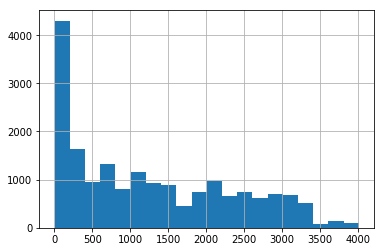

In [65]:
customers.recency.hist(bins=20)

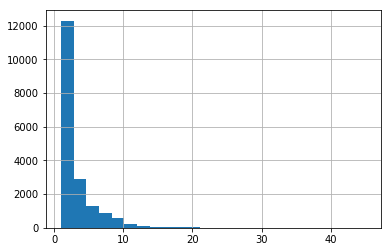

In [66]:
customers.frequency.hist(bins=24)

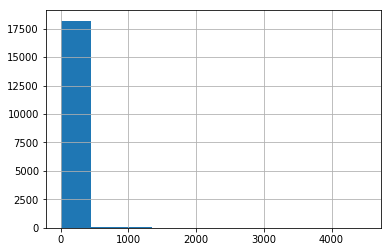

In [67]:
customers.amount.hist()

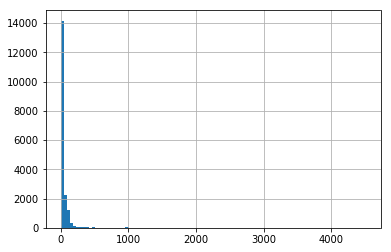

In [68]:
customers.amount.hist(bins=99)

## Preperaing and transforming data

In [69]:
# Copy customer data into new data frame
new_data = customers

# Remove customer id as a variable, store it as row names
new_data.head()

,customer_id,recency,frequency,amount
0,10,3829,1,30.000000
1,80,343,7,71.428571
2,90,758,10,115.800000
3,120,1401,1,20.000000
4,130,2970,2,50.000000


In [72]:
new_data = new_data.set_index(new_data.customer_id).iloc[:, 1:4]
new_data.head()

,recency,frequency,amount
customer_id,,,
10,3829,1,30.000000
80,343,7,71.428571
90,758,10,115.800000
120,1401,1,20.000000
130,2970,2,50.000000


In [83]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18417 entries, 10 to 264200
Data columns (total 3 columns):
recency      18417 non-null int64
frequency    18417 non-null int64
amount       18417 non-null float64
dtypes: float64(1), int64(2)
memory usage: 575.5 KB


In [97]:
# TAke the log-transform of the amount
import math
#from math import log
from mrcnn.model import log
new_data.amount = log(new_data.amount)
new_data.amount.hist(bins=19)

ModuleNotFoundError: No module named 'mrcnn'

In [85]:
# Standardize variables
new_data = pd.DataFrame(scale(new_data), index=new_data.index, columns=new_data.columns)
new_data.head()

/anaconda3/envs/deep_learning/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


,recency,frequency,amount
customer_id,,,
10,2.382043,-0.606909,-0.180058
80,-0.841530,1.436125,0.088339
90,-0.457771,2.457642,0.375800
120,0.136824,-0.606909,-0.244843
130,1.587709,-0.266403,-0.050487


## Hir Segmentation

In [ ]:
# Compute distance metrics on standardized data
# This will likely generate an error on most machines
# d = dist(new_data)

In [90]:
# Take a 10% sample
customers_sample = customers.iloc[::10, :]
new_data_sample  = new_data.iloc[::10, :]

In [ ]:
# Compute distance metrics on standardized data
#d = pdist(new_data_sample)
#not needed for ward

In [92]:
# Perform hierarchical clustering on distance metrics
c = linkage(new_data_sample, method='ward')

# Plot the dendogram
#dendrogram(c, get_leaves=True, labels=None)

In [93]:
# Cut at 9 segments
members = pd.DataFrame(cut_tree(c, n_clusters = 9), index=new_data_sample.index, columns=['ClusterNumber'])

In [94]:
# Show 30 first customers, frequency table
members.iloc[0:30]
members.ClusterNumber.value_counts(sort=False)

0    181
1    131
2    267
3    376
4    406
5     29
6    441
7      9
8      2
Name: ClusterNumber, dtype: int64

In [95]:
# Show profile of each segment
customers_sample_new = customers_sample.set_index(customers_sample.customer_id).iloc[:,1:4]
customers_sample_new.groupby(members.ClusterNumber).mean()

,recency,frequency,amount
ClusterNumber,,,
0,3225.629834,1.066298,30.082873
1,229.648855,10.259542,66.454299
2,594.823970,5.239700,46.738345
3,197.470745,1.680851,48.589122
4,2356.428571,1.706897,38.273399
5,633.931034,2.862069,519.151839
6,1123.160998,1.421769,38.499074
7,74.000000,20.777778,35.800556
8,1579.000000,4.000000,2111.142857
